In [37]:
from qiskit import *
from qiskit.visualization import plot_histogram
import json

# load locally stored api key
f = open('ibmq_key.json',)
ibmq_key = json.load(f)

%matplotlib inline

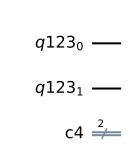

In [39]:
# Build a simple quantum register

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)
circuit.draw(output = 'mpl')

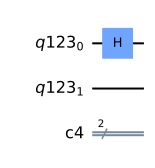

In [40]:
# Apply a Hamadard gate to the first qubit

circuit.h(qr[0])
circuit.draw(output = 'mpl')

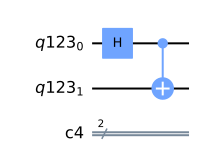

In [41]:
# Apply a controlled x gate, analagous to a classic XOR gate

circuit.cx(qr[0], qr[1])
circuit.draw(output = 'mpl')

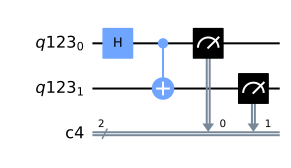

In [44]:
# Measure the circuit to derive it's states

circuit.measure(qr, cr)
circuit.draw(output = 'mpl')

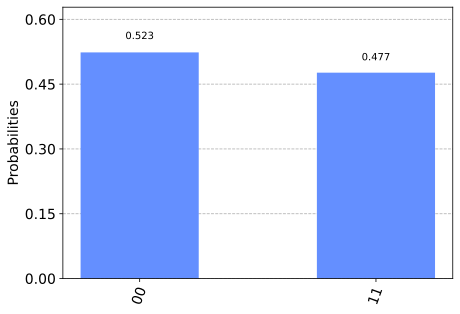

In [45]:
# Simulate a quantum experiment

simulator = Aer.get_backend('qasm_simulator')
res = execute(circuit, backend=simulator).result()
plot_histogram(res.get_counts(circuit))

In [47]:
# Now run on real quantum computer

from qiskit.tools.monitor import job_monitor

#provider = IBMQ.enable_account(ibmq_key)
quantum_computer = provider.get_backend("ibmq_16_melbourne") # can be another device.
job = execute(circuit, backend=quantum_computer)

In [48]:
# Use the job monitor to see how it is running on the real quantum device

job_monitor(job)

Job Status: job has successfully run


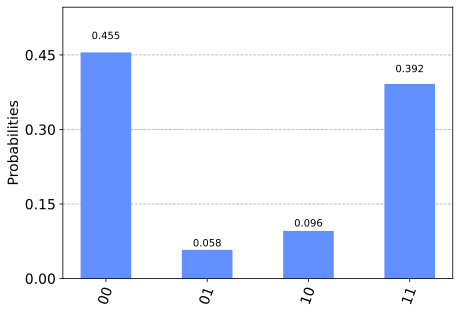

In [50]:
# Note that there are now 'in-between' states measured on teh quantum computer

counts = job.result().get_counts()
plot_histogram(counts)